LSE Data Science Institute | DS105A (2023/24) | Week 08

# 🗓️ Week 08: Pre-processing and grouping data with pandas, a groupby-apply tutorial

Theme: Cleaning and reshaping data

**LAST UPDATED:** 23 November 2023

**AUTHOR:** Dr [Jon Cardoso-Silva](https://jonjoncardoso.github.io)

-----


# **📚 PREPARATION**

1. Clone this repository to your computer.
2. Add it to your VS Code workspace.
3. Go to [IMDb Non-Commercial Datasets](https://developer.imdb.com/non-commercial-datasets/) page, and download all `tsv.gz` files from there, place all of that under the `data/raw/` folder. This folder is gitignored, we don't want to push large data files to GitHub!
4. Run:

    ```bash
    pip install -r requirements.txt
    ```

## ⚙️ Setup

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from plotnine import *
from pprint import pprint
from tqdm.notebook import tqdm

# Configure some settings for high quality plots
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

# Part 1: Read zipped files

You will have noticed that the files we downloaded from IMDb are compressed, which means they were transformed from **plain text** into a convenient **binary format** that uses less space. This is a good practice when handling large text-based files, making them easier to store and transfer. However, we _do_ need to read the files into memory, and for that, we need to decompress them.

**How to decompress files?**

- If you are on Windows, you can use software like [7-Zip](https://www.7-zip.org/). After installing it, right-click on the file and select "Extract here".
- If you are on Mac, you can use the built-in Archive Utility. Right-click on the file and select "Open with" > "Archive Utility". Or, simply double-click on the file.

**🐼 `pandas` for the rescue!**

Luckily, `pandas` has our back. It can read compressed files directly without the need to decompress them first. If you specify the `compression` argument, the `pd.read_csv()` function can read compressed files directly  <sup>\[[1](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)\]</sup>

If the file inside the compressed `.gz` file was a CSV, we could read it like this:

```python
pd.read_csv("../data/raw/name.basics.tsv.gz", compression="gzip").head()
```

However, note that the files we downloaded from IMDb are **TSV** files, not CSV. TSV stands for **Tab-Separated Values**, and it is a format similar to CSV, but instead of using commas to separate values, it uses tabs (`\t`). Why use TSV? Who knows. The developers thought it was a good idea, I guess. 

Anyway, since the format is still very similar to CSV, we can use the same function to read it, but we need to specify the `sep` argument to tell `pandas` that the separator is a tab (`\t`):

## 1.1: 👽 Establishing first contact with the data

In [2]:
# This will take a bit of time, it is a large file
df_name_basics = pd.read_csv("../data/raw/name.basics.tsv.gz", compression="gzip", sep="\t")

🗣️ **QUESTION TO THE CLASSROOM:** What are the first things we should do when we read a new dataset, **whether** collected by you or from someone else?

<div style="color:#f8f8f8">

<details><summary>Click here to see some hidden tips</summary>

Open new code cells with the following code:

```python
# Glimpse at the data
df_name_basics.head()
```

```python
# Get a bit of info on the data types and memory usage
df_name_basics.info()
```

```bash
# How does the memory usage compare to the file size?
!ls -lth ../data/raw/
```
</summary>

</div>

In [ ]:
# Glimpse at the data
df_name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0075213"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0057345,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0078723,tt0080455,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0083922,tt0050976,tt0050986"


In [ ]:
# Get a bit of info on the data types and memory usage
df_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13010001 entries, 0 to 13010000
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 595.6+ MB


In [ ]:
# How does the memory usage compare to the file size?
!ls -lth ../data/raw/

total 2616056
-rw-r--r--@ 1 jon  staff   436M Nov 15 16:02 title.principals.tsv.gz
-rw-r--r--@ 1 jon  staff   6.6M Nov 15 16:02 title.ratings.tsv.gz
-rw-r--r--@ 1 jon  staff   172M Nov 15 16:01 title.basics.tsv.gz
-rw-r--r--@ 1 jon  staff    41M Nov 15 16:01 title.episode.tsv.gz
-rw-r--r--@ 1 jon  staff    66M Nov 15 16:01 title.crew.tsv.gz
-rw-r--r--@ 1 jon  staff   305M Nov 15 16:01 title.akas.tsv.gz
-rw-r--r--@ 1 jon  staff   245M Nov 15 16:01 name.basics.tsv.gz


## 1.2 🗃️ Being your best perfectionist with data types

🎯 **ACTION POINTS:**

Work in groups (same composition as your group project) and do the following:

1. Disable GitHub Copilot, and don't use ChatGPT for now. Or it will make this less fun.

2. Modify the columns so that, in the end, they have the data types listed above. Try to deal with any errors that may arise.

3. Once you solved the errors, go to issue [#1](https://github.com/lse-ds105/w08-imdb-data/issues/1)(https://github.com/lse-ds105/w08-imdb-data/issues/1) that I created in this repository and add your group's solution. (add your group's name)


💡 Tips (if stuck):

- Look back at your W07 lab notebook to remember how to change data types.
- If you get an error, try to understand what it means.
- If you need to replace the contents of a column in pandas, you can use the `df["column_name"] = ...` syntax.

In [4]:
df_name_basics = pd.read_csv("../data/raw/name.basics.tsv.gz", compression="gzip", sep="\t", na_values="\\N")

In [5]:
df_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13010001 entries, 0 to 13010000
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   nconst             object 
 1   primaryName        object 
 2   birthYear          float64
 3   deathYear          float64
 4   primaryProfession  object 
 5   knownForTitles     object 
dtypes: float64(2), object(4)
memory usage: 595.6+ MB


In [6]:
df_name_basics.describe()

,birthYear,deathYear
count,597042.000000,222153.000000
mean,1952.913492,1992.649849
std,34.937400,34.546702
min,1.000000,17.000000
25%,1932.000000,1979.000000
50%,1959.000000,2001.000000
75%,1979.000000,2014.000000
max,2023.000000,2023.000000


In [7]:
df_name_basics["deathYear"] = df_name_basics["deathYear"].astype('Int16')
df_name_basics["birthYear"] = df_name_basics["birthYear"].astype('Int16')

# Part 2: 📊 Exploring the data

(This is also an 🎯 **ACTION POINT**)

Let's pose a few questions to the data:

**Q1:** Summarise: how many people recorded in this dataset are alive, and how many are dead?

In [11]:
df_name_basics['is_alive'] = df_name_basics['deathYear'].isna()
df_name_basics['is_alive'].value_counts()

is_alive
True     12787848
False      222153
Name: count, dtype: int64

In case you enjoy practising some f-strings:

In [14]:
print(f"Answer: {df_name_basics['is_alive'].value_counts()[True]} people are presumed alive")
print(f"Answer: {df_name_basics['is_alive'].value_counts()[False]} people are dead")

Answer: 12787848 people are presumed alive
Answer: 222153 people are dead


**Q2:** Focusing on those who are dead, calculate their `age_at_death` (in years) as a separate column. Then, plot a histogram of the ages at death. What is the most common age at death?

In [22]:
df_name_basics['age_at_death'] = df_name_basics['deathYear'] - df_name_basics['birthYear']

valid_rows = df_name_basics['is_alive'] == False

plot_df = df_name_basics[valid_rows]

# Investigate problems with the data
plot_df['age_at_death'].describe()


count     208468.0
mean     71.119625
std      16.889026
min          -62.0
25%           61.0
50%           74.0
75%           84.0
max         1076.0
Name: age_at_death, dtype: Float64

I doubt that anyone lived to be 1000+ years old, and I also doubt that anyone died before they were born. Let's filter out those rows:

In [26]:
# Redefine valid_rows
valid_rows = (df_name_basics['is_alive'] == False) & (df_name_basics['age_at_death'] > 0) & (df_name_basics['age_at_death'] < 150)

# Redefine plot_df
plot_df = df_name_basics[valid_rows]

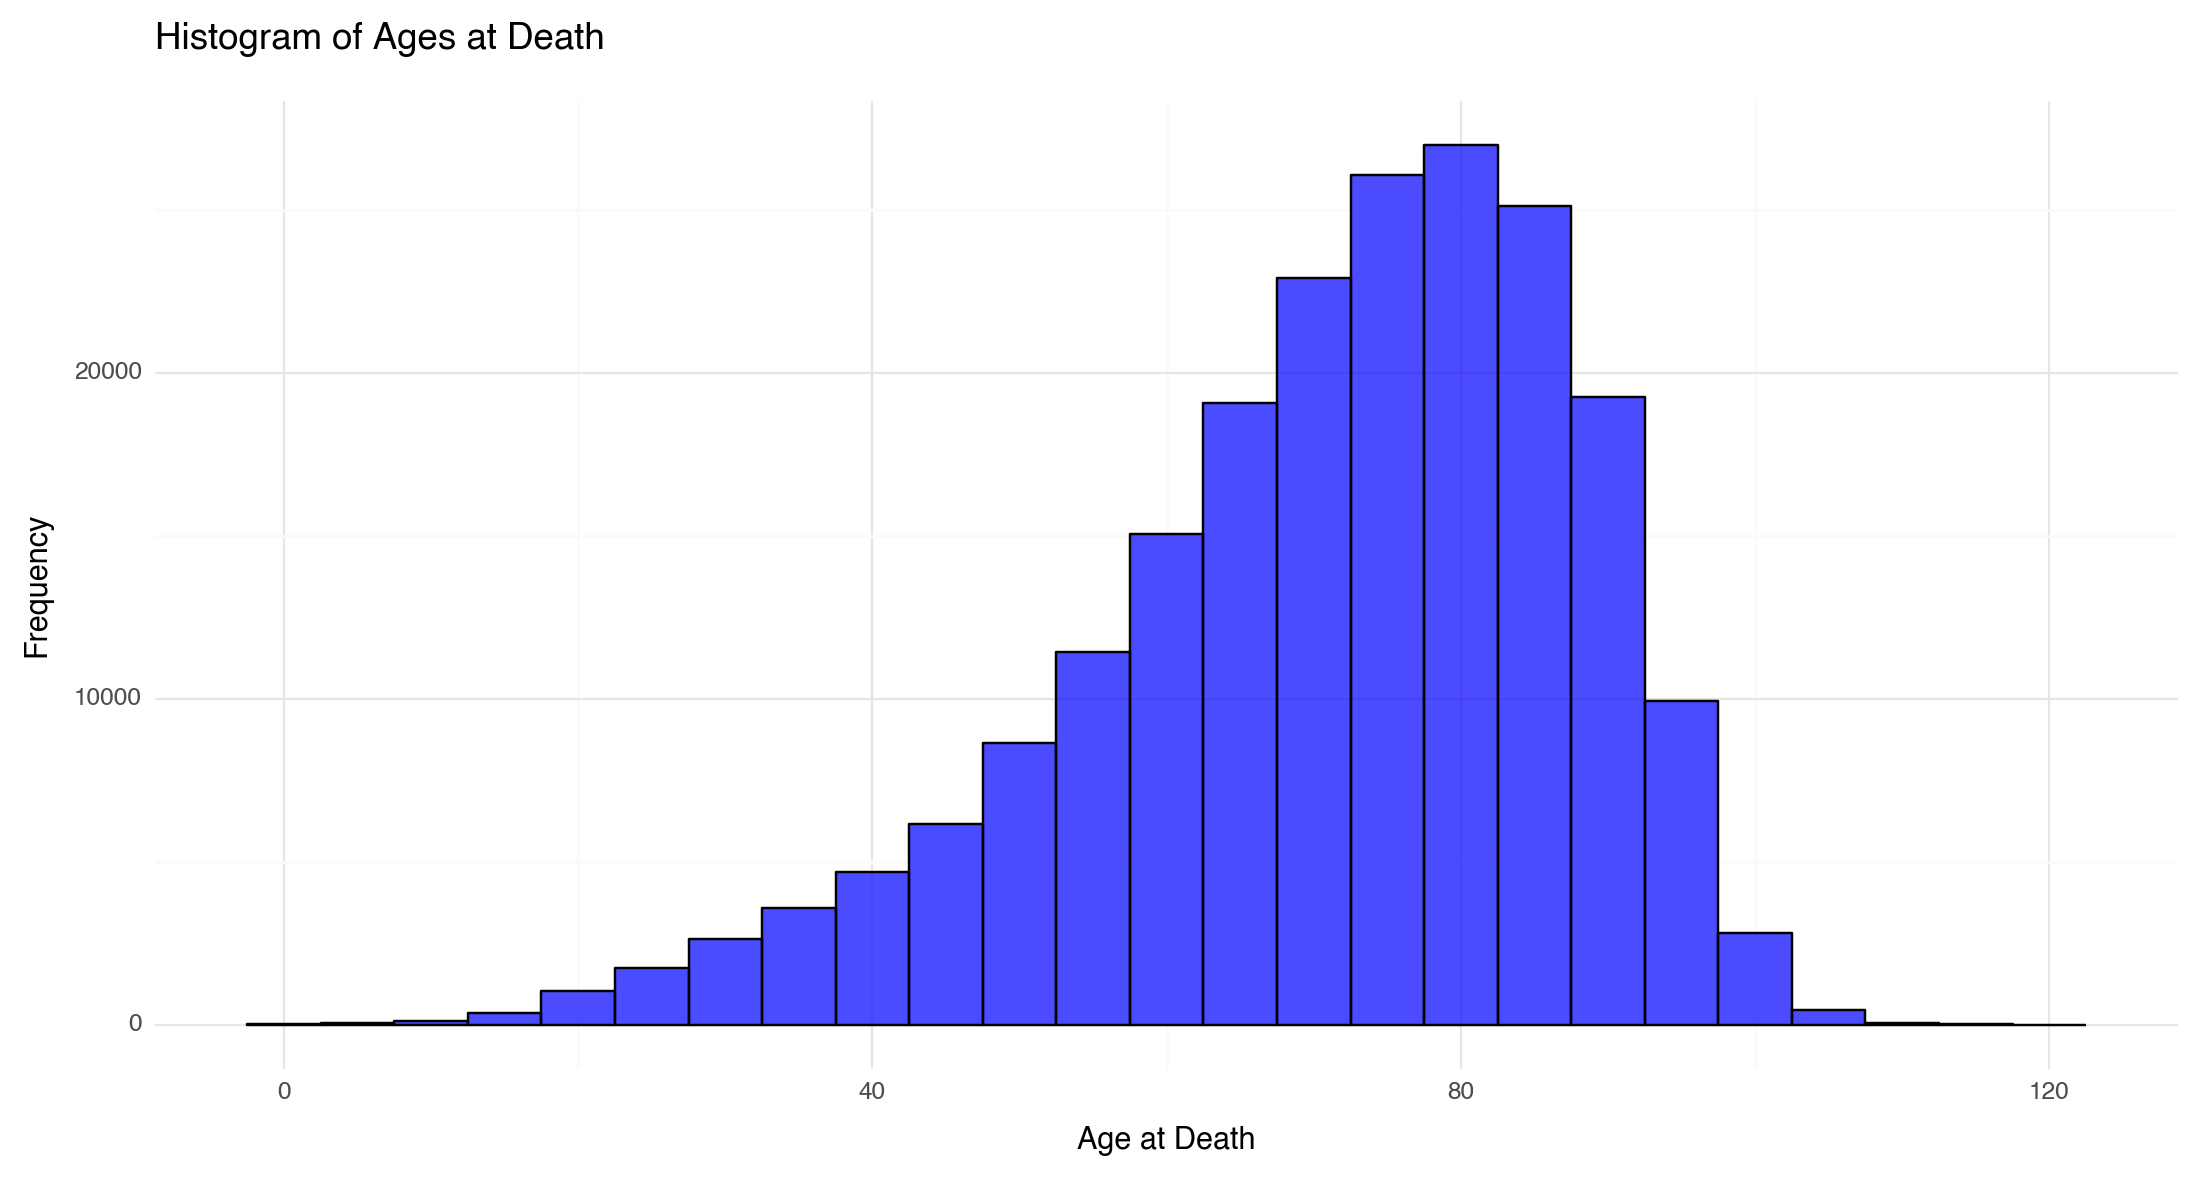

<Figure Size: (1100 x 600)>

In [27]:
p = (
    ggplot(plot_df, aes(x='age_at_death')) +
    geom_histogram(binwidth=5, fill='blue', color='black', alpha=0.7) +
    labs(title='Histogram of Ages at Death', x='Age at Death', y='Frequency') +
    theme_minimal() + 
    theme(figure_size=(11, 6))
)

p

**Q3:** How many primary professions does each person have? Plot a bar chart of the number of professions per person.

In [1]:
# Your answer here

**Q4:** Did those with acting roles die younger or older than those with other roles?

In [2]:
# Your answer here

# Part 3: 🔃 Data from multiple sources

(This is also an 🎯 **ACTION POINT**)

This time, you are asked to complement `df_name_basics` from the IMDb dataset with data from another dataset, `df_title_basics`, which contains information about the titles in which each person has participated.


**Step 1:** Add a dict column to the `df_name_basics` indicating the genres of the titles in which each person has participated. The dict should have the following format:

```python
{
    "genre_1": count_of_titles_in_genre_1,
    "genre_2": count_of_titles_in_genre_2,
    ...
}
```

**Q5:** Focusing on just **movies**, what is the average age of actors in their first movie? What is the average age of actors during their last recorded movie?